<a href="https://www.kaggle.com/code/tiwariaman01/medical-insurance-claim-data?scriptVersionId=182088996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid")
plt.style.use('fivethirtyeight')


In [2]:
df= pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no missing values available in data.

In [5]:
df['sex']= df['sex'].astype('category')
df['smoker']= df['smoker'].astype('category')
df['region']= df['region'].astype('category')


In [6]:
df.describe( )

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation**
* avarage of age is 39 , range of age is between 18 to 64.
* avarage of BMI is 30 , maximum BMI is 52.
* avarage of  customer children  is 1 , maximum is 5.
* average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
* mean is higher than median is not equal in health insurance charges . which mean,it most probably indicating distrubution is postively skewed .

In [7]:
df.describe( include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Observation**
* male population is most frequent in sample data.
* non smoker is significantly higher than smoker.

In [8]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

**Types of variable**

* Categoreical Columns : Sex,Smoker and Region
* Numerical columns : age,BMI, children,charges.


In [9]:
cat_col = df.select_dtypes(['category']).columns
for i in range(len(cat_col)):
 print( df[cat_col[i]].value_counts())
    

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


**Observation**
* ratio of sex is equal.
* no smoker is higher 
* sample population is equaly divided into region.


# Exploratory Data Analysis¶

**Univeriate analysis**

In [10]:
def uniplot(data):
    name = data.name.upper()
    
    fig,(box_ax,dis_ax) = plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8,5))
    
    mean= data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    
    fig.suptitle("SPREAD OF DATA "+ name ,fontsize=18,fontweight='bold')
    
    sns.boxplot(x=data,orient='h',ax=box_ax,showmeans=True,palette='rainbow')
    
    box_ax.set(xlabel="")
    
    sns.histplot(x=data,kde=False,ax=dis_ax,palette='rainbow')
    dis_ax.axvline(mean,color='r',linestyle='--',linewidth=2)
    dis_ax.axvline(median,color='y',linestyle='-',linewidth=2)
    dis_ax.axvline(mode,color='g',linestyle='-',linewidth=2)
    
    plt.legend({"mean":mean,"median":median,"mode":mode})

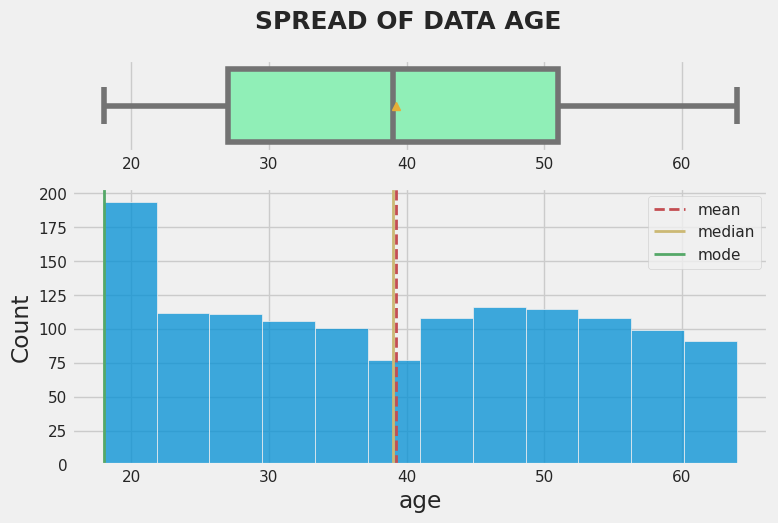

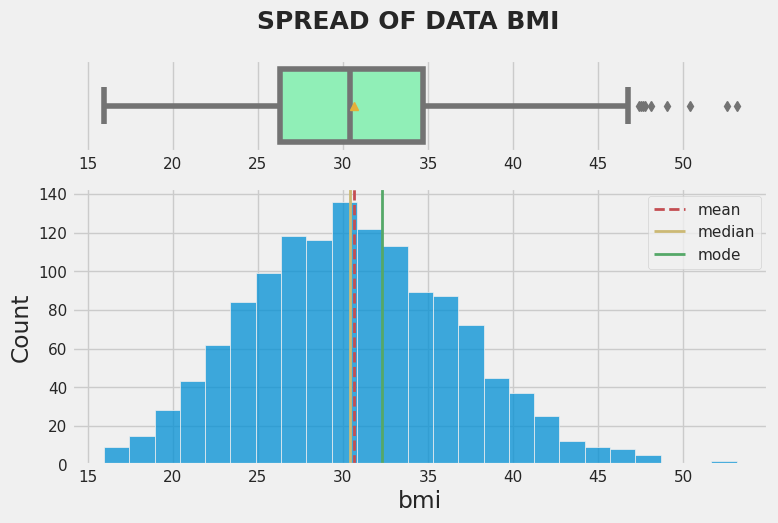

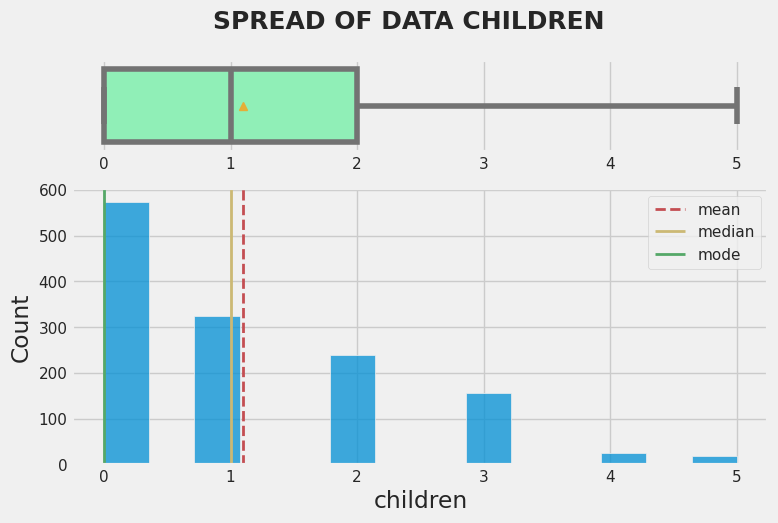

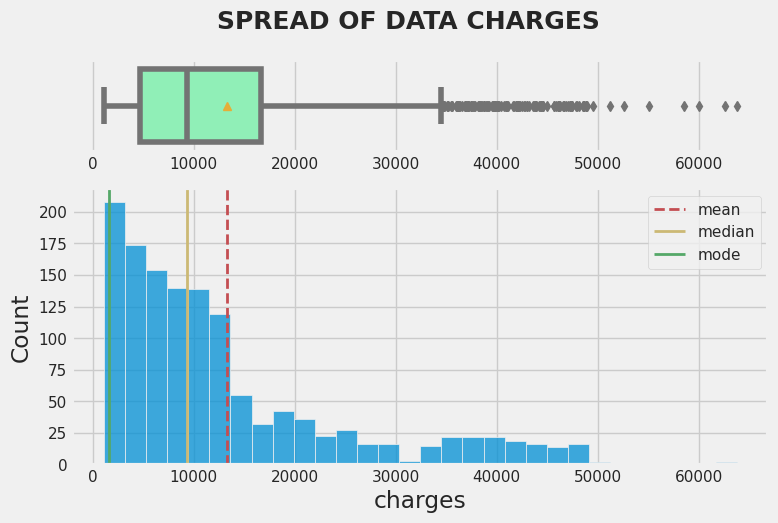

In [11]:
num_col = df.select_dtypes([np.number]).columns

for i in range(len(num_col)):
    uniplot(df[num_col[i]])


**Observation**

* Age -- in sample data , 20 year old polpulation is higher than age number . the distribution is seems uniform.
* BMI -- bmi is normal distribution.

In [12]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

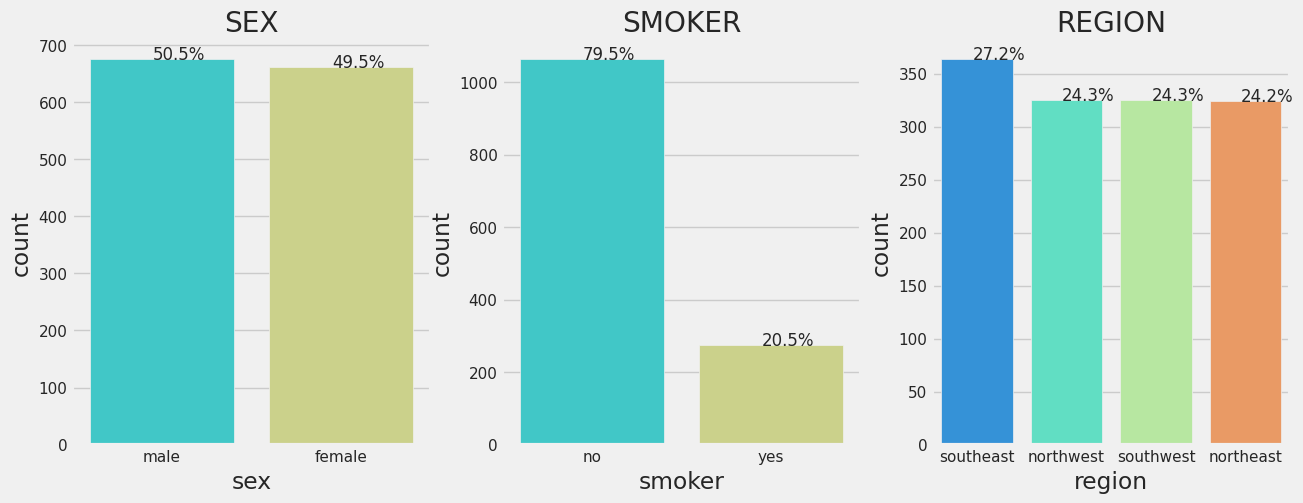

In [13]:
cate_col =  df.select_dtypes(['category']).columns
fig1, axes1 =plt.subplots(1,3,figsize=(14, 5))
for i in range(len(cate_col)):
    order = df[cate_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=cate_col[i], data=df , order=order,ax=axes1[i],palette='rainbow').set(title=cate_col[i].upper())
    bar_perc(axes1[i],df[cate_col[i]])

 **Overvation**
 * sex -- male population is slightly heigher than female
 * smoker -- only 20% is smoker.
 * region -- southeast sample population is slightly higher than northwest,southwest and northeast.

**Multivariante analysis**

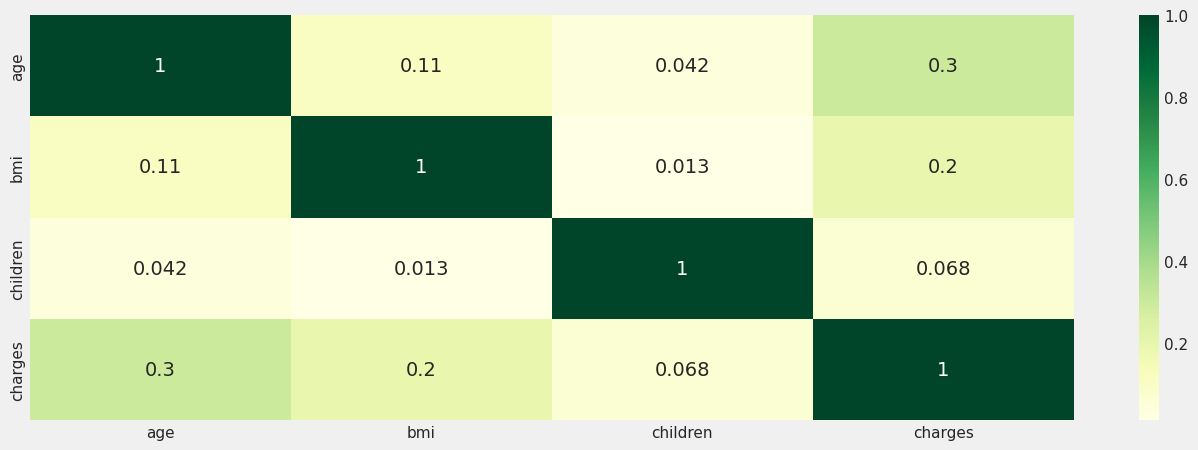

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df[num_col].corr(),annot=True ,cmap="YlGn")
plt.show()

<Figure size 500x500 with 0 Axes>

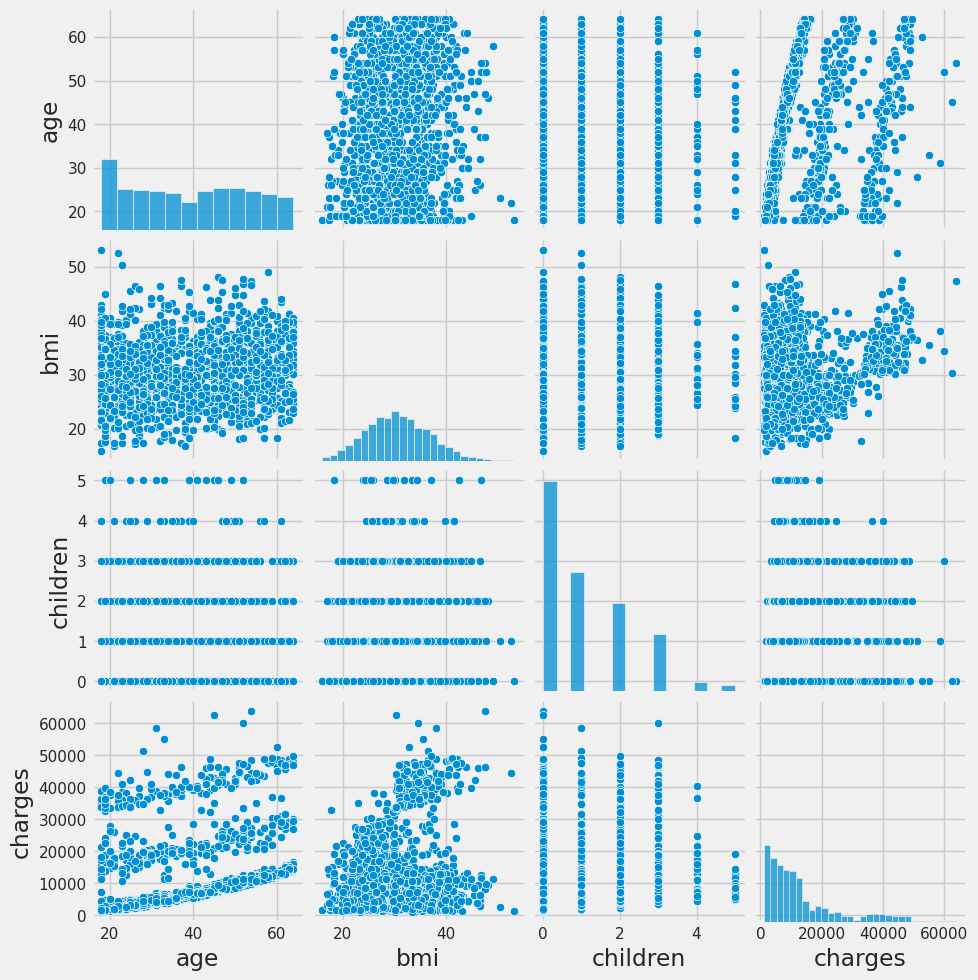

In [15]:
plt.figure(figsize=(5,5))
sns.pairplot(data = df,palette='rainbow')

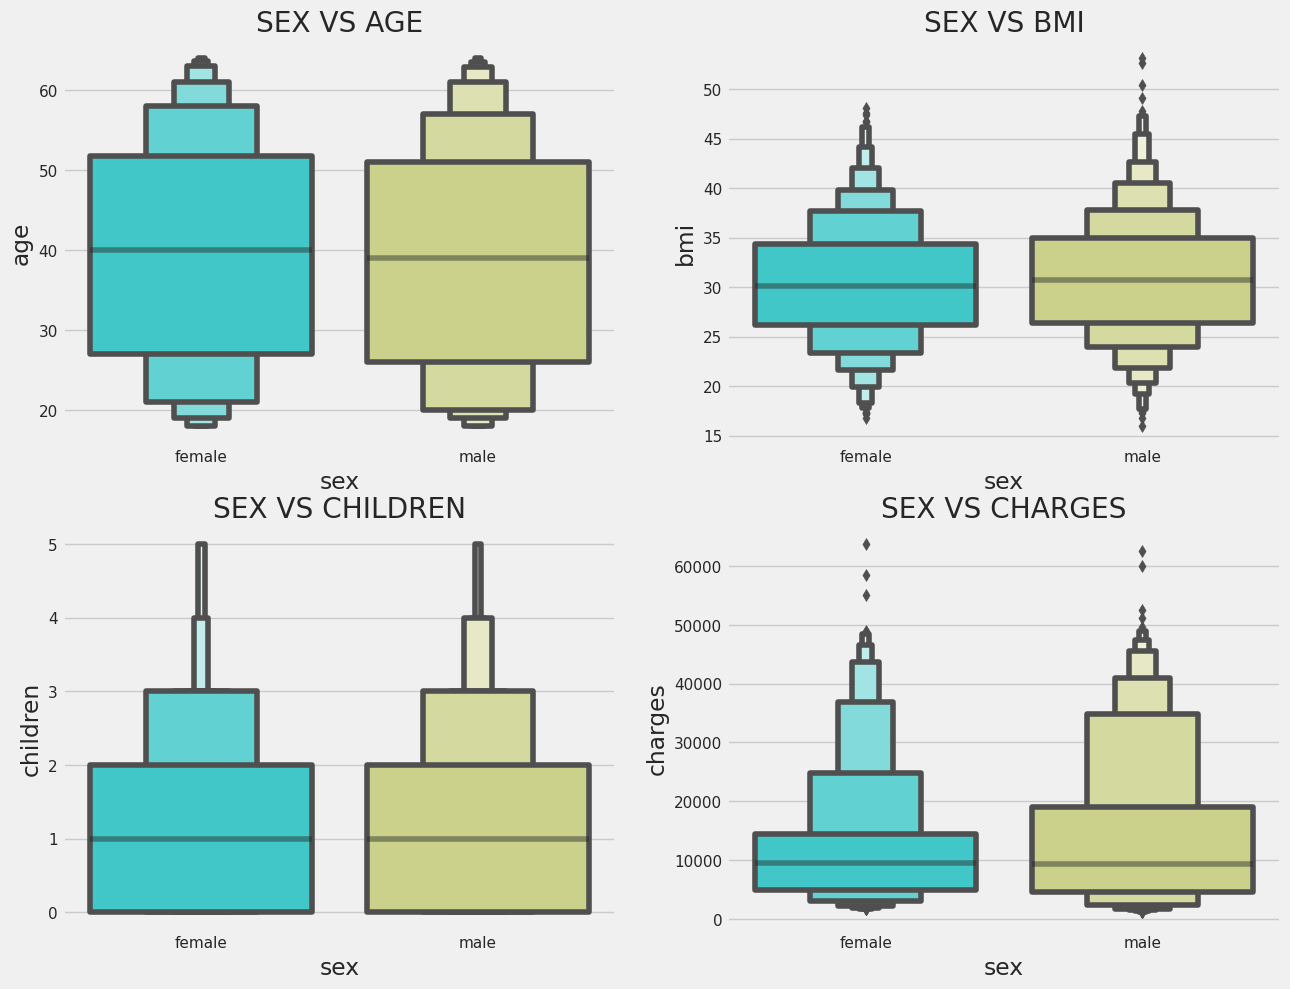

In [16]:
fig , axes = plt.subplots(2,2,figsize=(14,11))
num_col = df.select_dtypes([np.number]).columns

for i in range(len(num_col)):
    row=i//2
    col=i%2
    ax = axes[row,col]
    sns.boxenplot(y=df[num_col[i]],x=df['sex'],ax=ax,palette='rainbow', orient='v').set(title='SEX VS '+ num_col[i].upper())

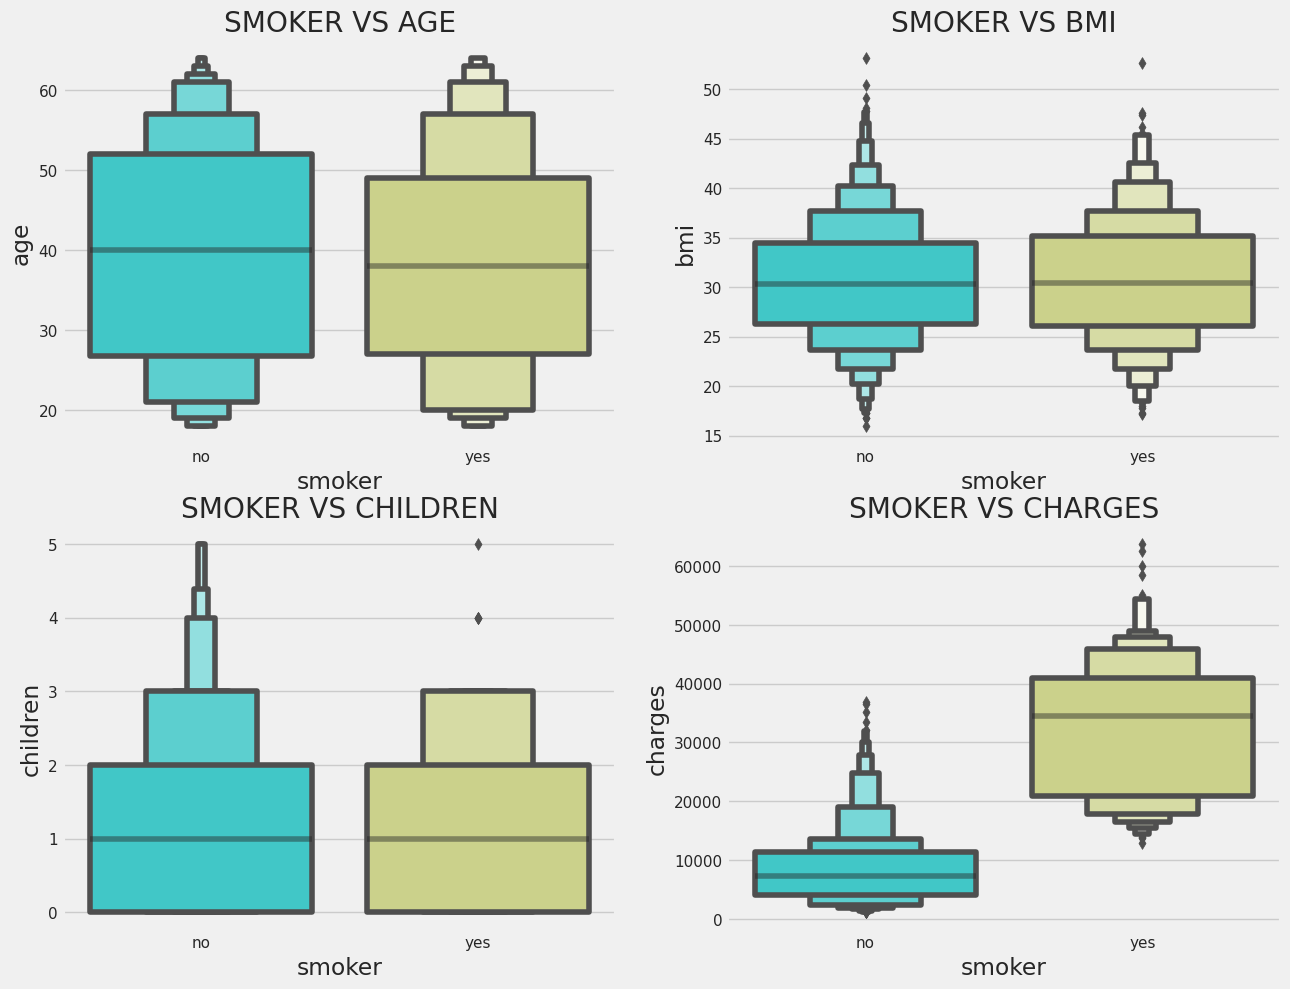

In [17]:
fig , axes = plt.subplots(2,2,figsize=(14,11))
num_col = df.select_dtypes([np.number]).columns

for i in range(len(num_col)):
    row=i//2
    col=i%2
    ax = axes[row,col]
    sns.boxenplot(y=df[num_col[i]],x=df['smoker'],ax=ax, palette='rainbow', orient='v').set(title='SMOKER VS '+ num_col[i].upper())

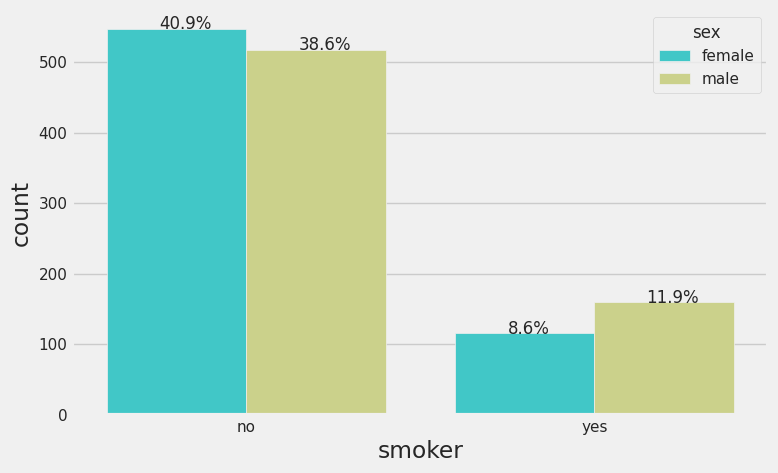

In [18]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=df,x='smoker',hue='sex',palette='rainbow')
bar_perc(ax,df['smoker'])


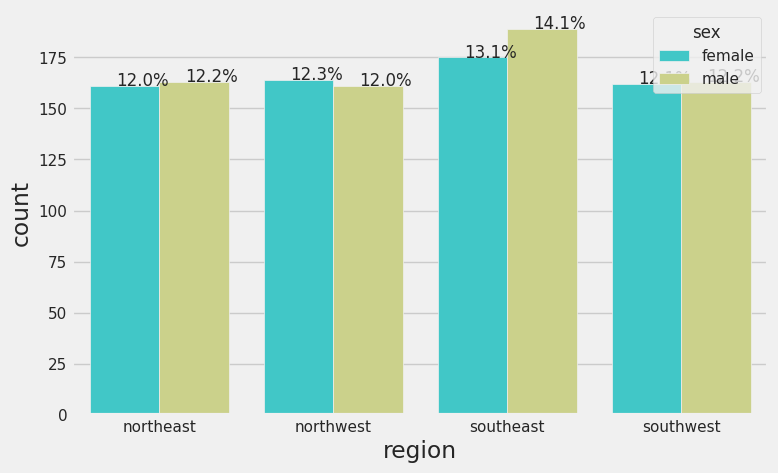

In [19]:
plt.figure(figsize=(8,5))
ax= sns.countplot(data=df,x='region',hue='sex',palette='rainbow')
bar_perc(ax,df['region'])

[Text(0.5, 1.0, 'Smoker vs Sex')]

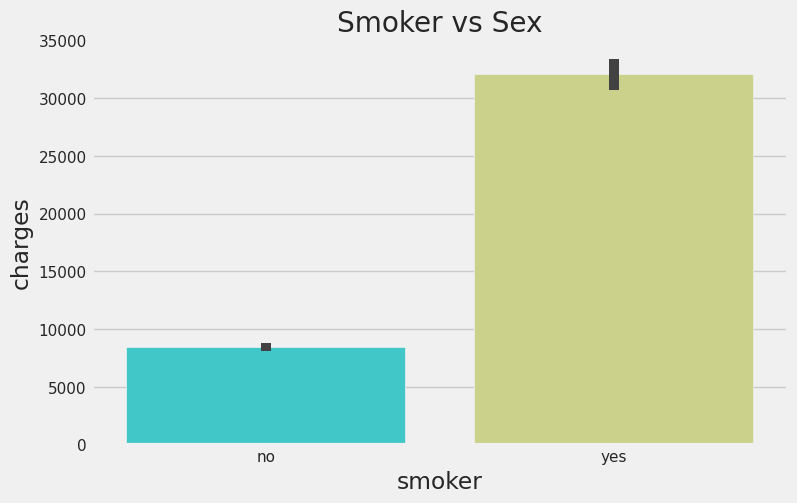

In [20]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='smoker',y='charges',estimator="mean",data=df,palette='rainbow')

ax.set(title="Smoker vs Sex")



[Text(0.5, 1.0, 'Smoker vs Sex')]

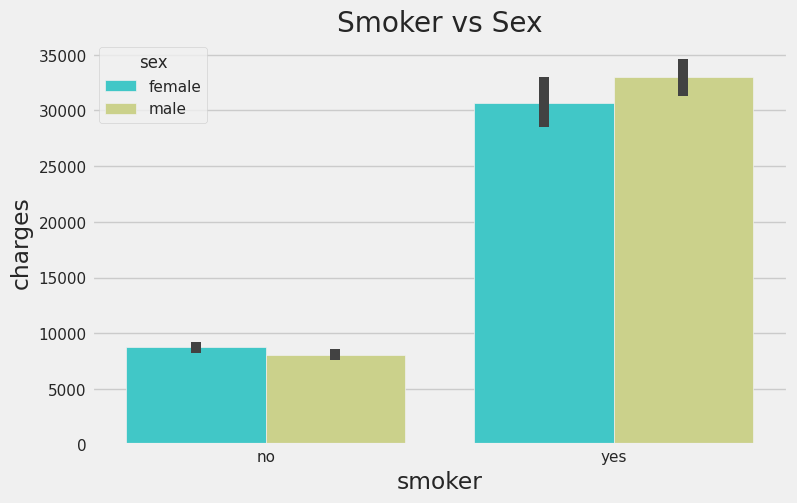

In [21]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='smoker',y='charges',estimator="mean",data=df,palette='rainbow',hue='sex')

ax.set(title="Smoker vs Sex")



[Text(0.5, 1.0, 'Region vs Sex')]

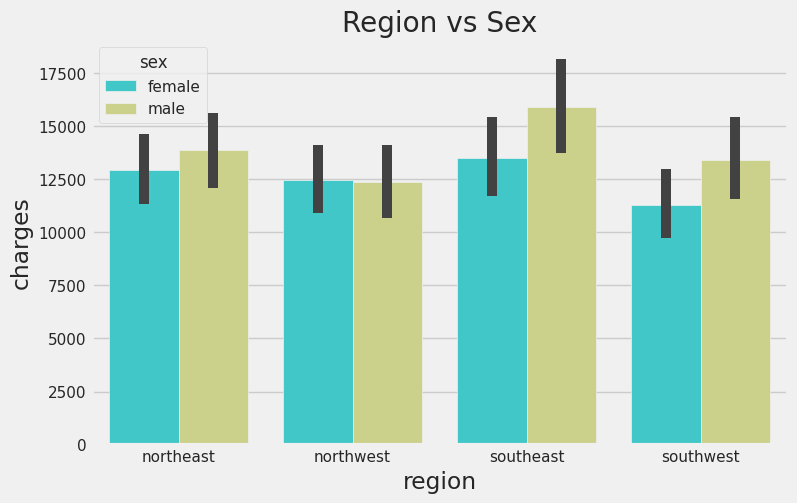

In [22]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='region',y='charges',estimator="mean",data=df,palette='rainbow',hue='sex')

ax.set(title="Region vs Sex")



[Text(0.5, 1.0, 'Region vs Sex')]

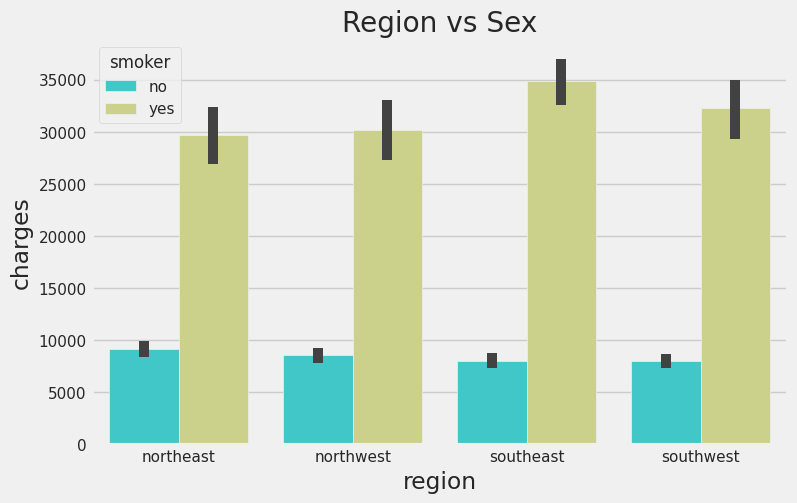

In [23]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x='region',y='charges',estimator="mean",data=df,palette='rainbow',hue='smoker',)

ax.set(title="Region vs Sex")


<Axes: xlabel='age', ylabel='charges'>

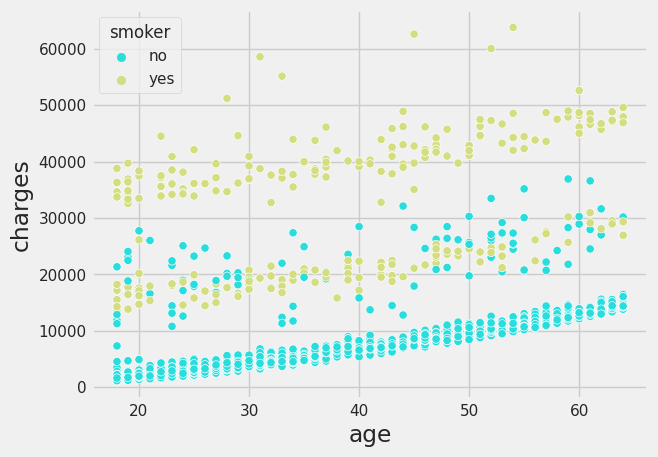

In [24]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker',palette='rainbow')

<Axes: xlabel='bmi', ylabel='charges'>

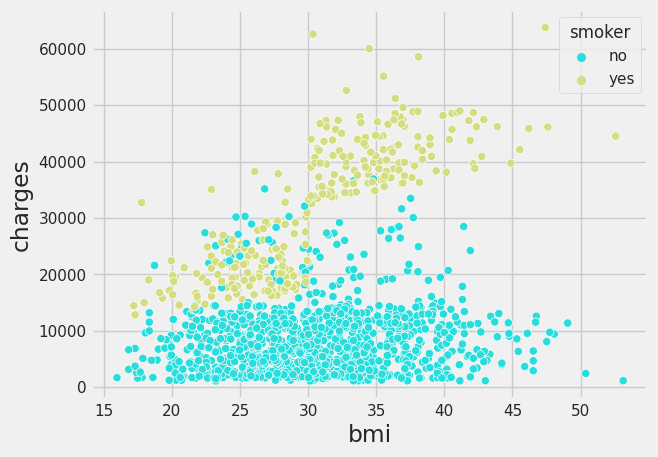

In [25]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',palette='rainbow')

[Text(0.5, 1.0, 'Smoker vs Sex')]

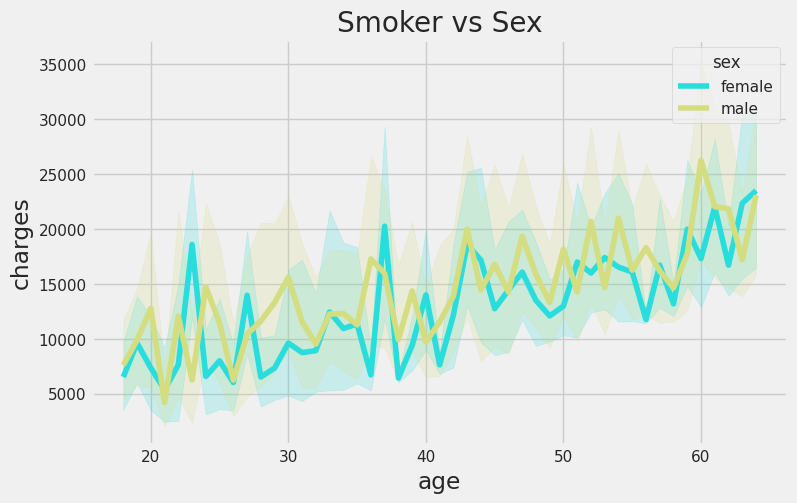

In [26]:
plt.figure(figsize=(8,5))
ax=sns.lineplot(x='age',y='charges',data=df,palette='rainbow',hue='sex')

ax.set(title="Smoker vs Sex")



In [27]:

# create age bins for more analsis

df['age_bins']= pd.cut(df['age'],bins=[17,28,38,48,58,65],labels=["18-28","29-38","39-48","49-58","59+"])
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,age_bins
1036,22,male,37.07,2,yes,southeast,37484.44930,18-28
71,31,male,28.50,5,no,northeast,6799.45800,29-38
593,21,female,21.85,1,yes,northeast,15359.10450,18-28
542,63,female,36.30,0,no,southeast,13887.20400,59+
658,48,female,35.91,1,no,northeast,26392.26029,39-48


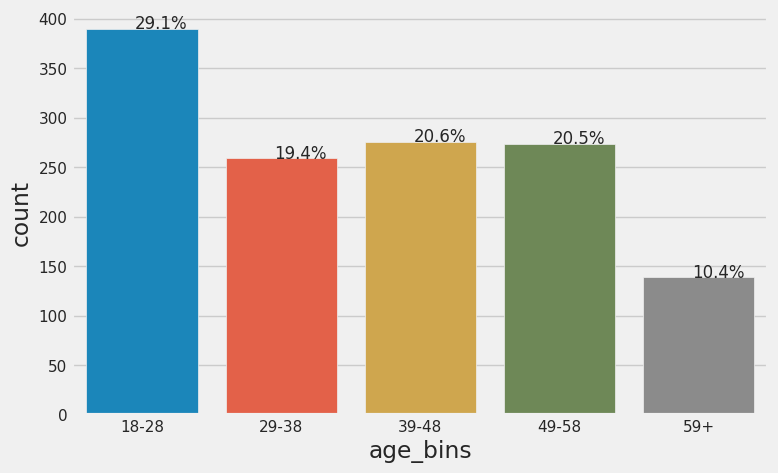

In [28]:
plt.figure(figsize=(8,5))
ax= sns.countplot(x=df['age_bins'])
bar_perc(ax,df['age_bins'])

In [29]:
pd.crosstab(df['age_bins'],df['children'],values=df['children'],aggfunc='sum')

children,0,1,2,3,4,5
age_bins,,,,,,
18-28,0,69,98,81,24,25
29-38,0,81,122,123,24,15
39-48,0,91,144,105,28,40
49-58,0,64,92,111,20,10
59+,0,19,24,51,4,0


<Axes: xlabel='age_bins'>

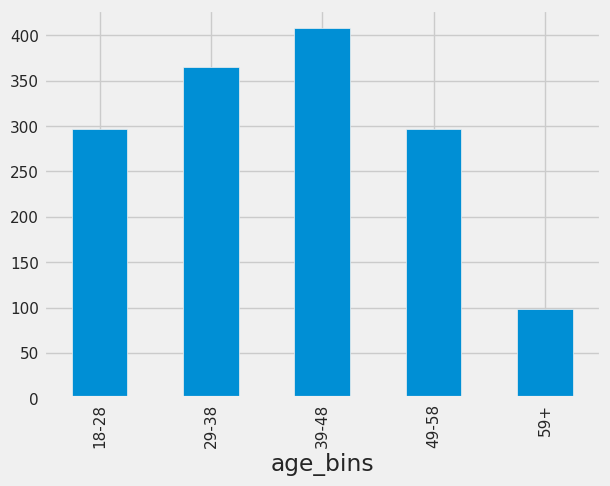

In [30]:
df.groupby('age_bins')['children'].sum().plot(kind='bar')